In [1]:
#Seqeuntial Data - Previous state
#LSTM - memory
#Forget gate - Sigmoid function - Used to see which particular data it ineeds to keep and what it needs to forget

In [9]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Layer
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [6]:
df=pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [13]:
#Vanilla autoencoder
# Load the data
(X_train,_),(X_test,_)=mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [17]:
#Reshape into 60000, 28, 28, 1
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [20]:
#Normalize the data 
#Grey scale goes from 0 to 255
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [19]:
X_train.shape

(60000, 28, 28, 1)

In [21]:
len(X_train)

60000

In [24]:
#Flatten the images 60000,784    10000,784
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))


In [26]:
X_train.shape

(60000, 784)

In [25]:
#Flatten the images 60000,784    10000,784
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

In [27]:
X_test.shape

(10000, 784)

In [30]:
#Vanilla Autoencoder - 3 layers
#Three layers input, hidden, output
input_size=784 #pixels
hidden_size=64
output_size=784

#Input is 784, and output is 784


In [32]:
#Create autoencoder
x=Input(shape=(input_size,))
h=Dense(hidden_size,activation='relu')(x)
r=Dense(output_size,activation='sigmoid')(h)

autoencoder=Model(inputs=x, outputs=r)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [33]:
autoencoder.compile(optimizer='adam',loss='mse')

In [36]:
epochs=5
batch_size=128

history=autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,X_test)) #We  pass X_train twice

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0042 - val_loss: 0.0041


In [37]:
autoencoder.save('va.h5')

In [38]:
decoded_imgs=autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


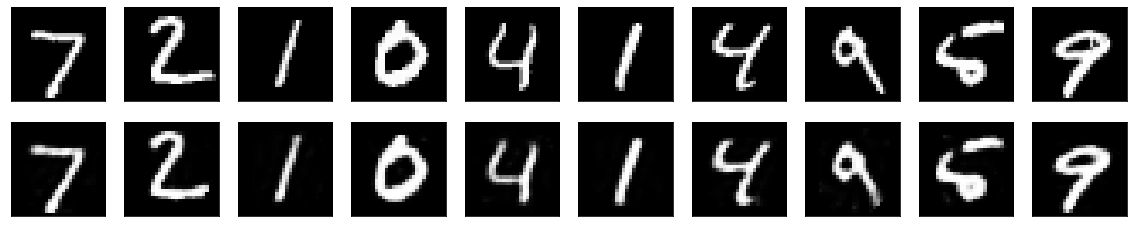

In [39]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()



dict_keys(['loss', 'val_loss'])


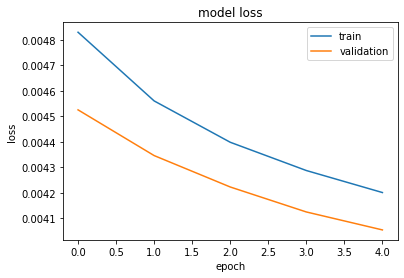

In [40]:
#Plot the losses here...
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [41]:
autoencoder.evaluate(X_test,X_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0041


0.0040546865202486515